
# Section II - Feature Selection

### Filter Methods

#### Part A - Correlation
The initial data set from zillow includes a separate file for the transactions,which includes the log error of actual sales price versus Zillow estimates, and a training data set that has 52 features.  



#### Part B - Ordinary Least Sqaures
We will find the OLS of the top 10 correlated features. We will it individually and as one regression. A full look at every OLS with every feature is done in the appendix (**[Appendix B - Ordinary Least Sqaures Exploration of All Features](Section6_AppendixB_UniCont.py)**). 




In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea
import scipy.stats as stats
import sklearn


from matplotlib import rcParams
sea.set_context("poster")
sea.set_style('whitegrid')

%pylab inline 
%matplotlib inline

df = pd.read_csv('FinishMissing.csv')
df=df.drop('Unnamed: 0',axis=1)
final=df

Populating the interactive namespace from numpy and matplotlib


## Part A - Finding Correlation

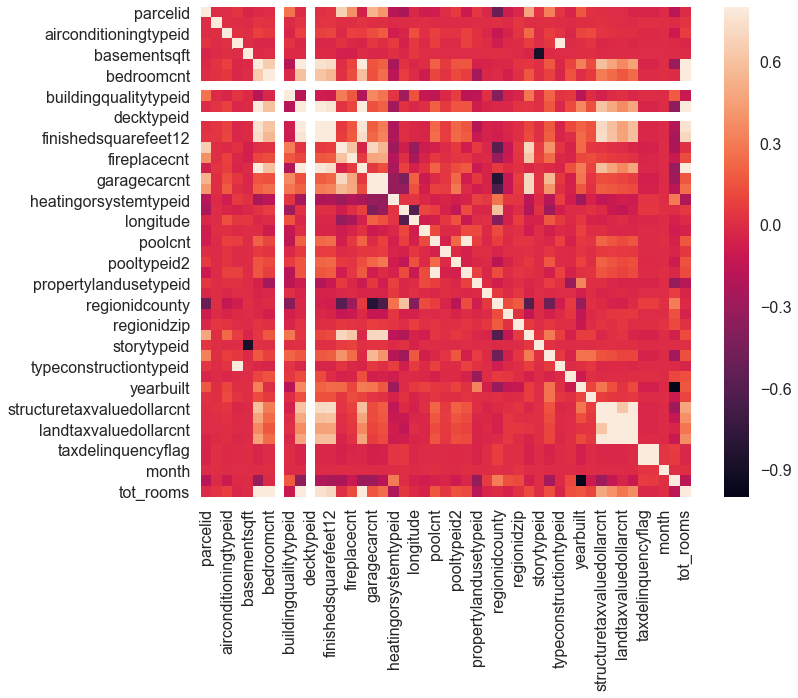

In [2]:
#Detail correlation matrix
corrmat = final.corr()
f, ax = plt.subplots(figsize=(12, 9))
sea.heatmap(corrmat, vmax=.8, square=True);


* There is definitely correlation among the variables as well as possbile instances of multicorrelation

In [3]:
#find top correlations
print('Correlation with Log Error')
print(final.corr(method='pearson').drop('logerror').sort_values('logerror', ascending=False)['logerror'].head(10))
print('\n')

Correlation with Log Error
regionidzip                     0.041160
finishedsquarefeet12            0.038603
calculatedfinishedsquarefeet    0.037711
calculatedbathnbr               0.029537
tot_rooms                       0.029434
fullbathcnt                     0.028701
bathroomcnt                     0.028513
bedroomcnt                      0.025156
structuretaxvaluedollarcnt      0.023596
taxdelinquencyflag              0.019178
Name: logerror, dtype: float64




### 'Logerror' correlation matrix (zoomed heatmap style)

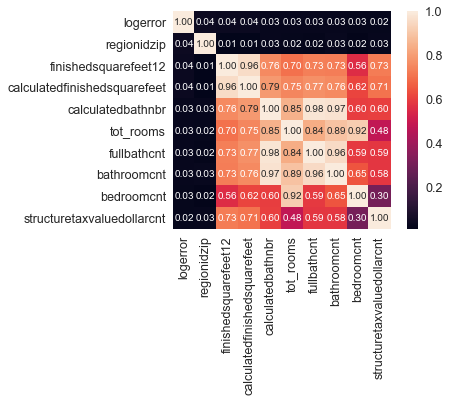

In [4]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'logerror')['logerror'].index
cm = np.corrcoef(final[cols].values.T)
sea.set(font_scale=1.25)
hm = sea.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

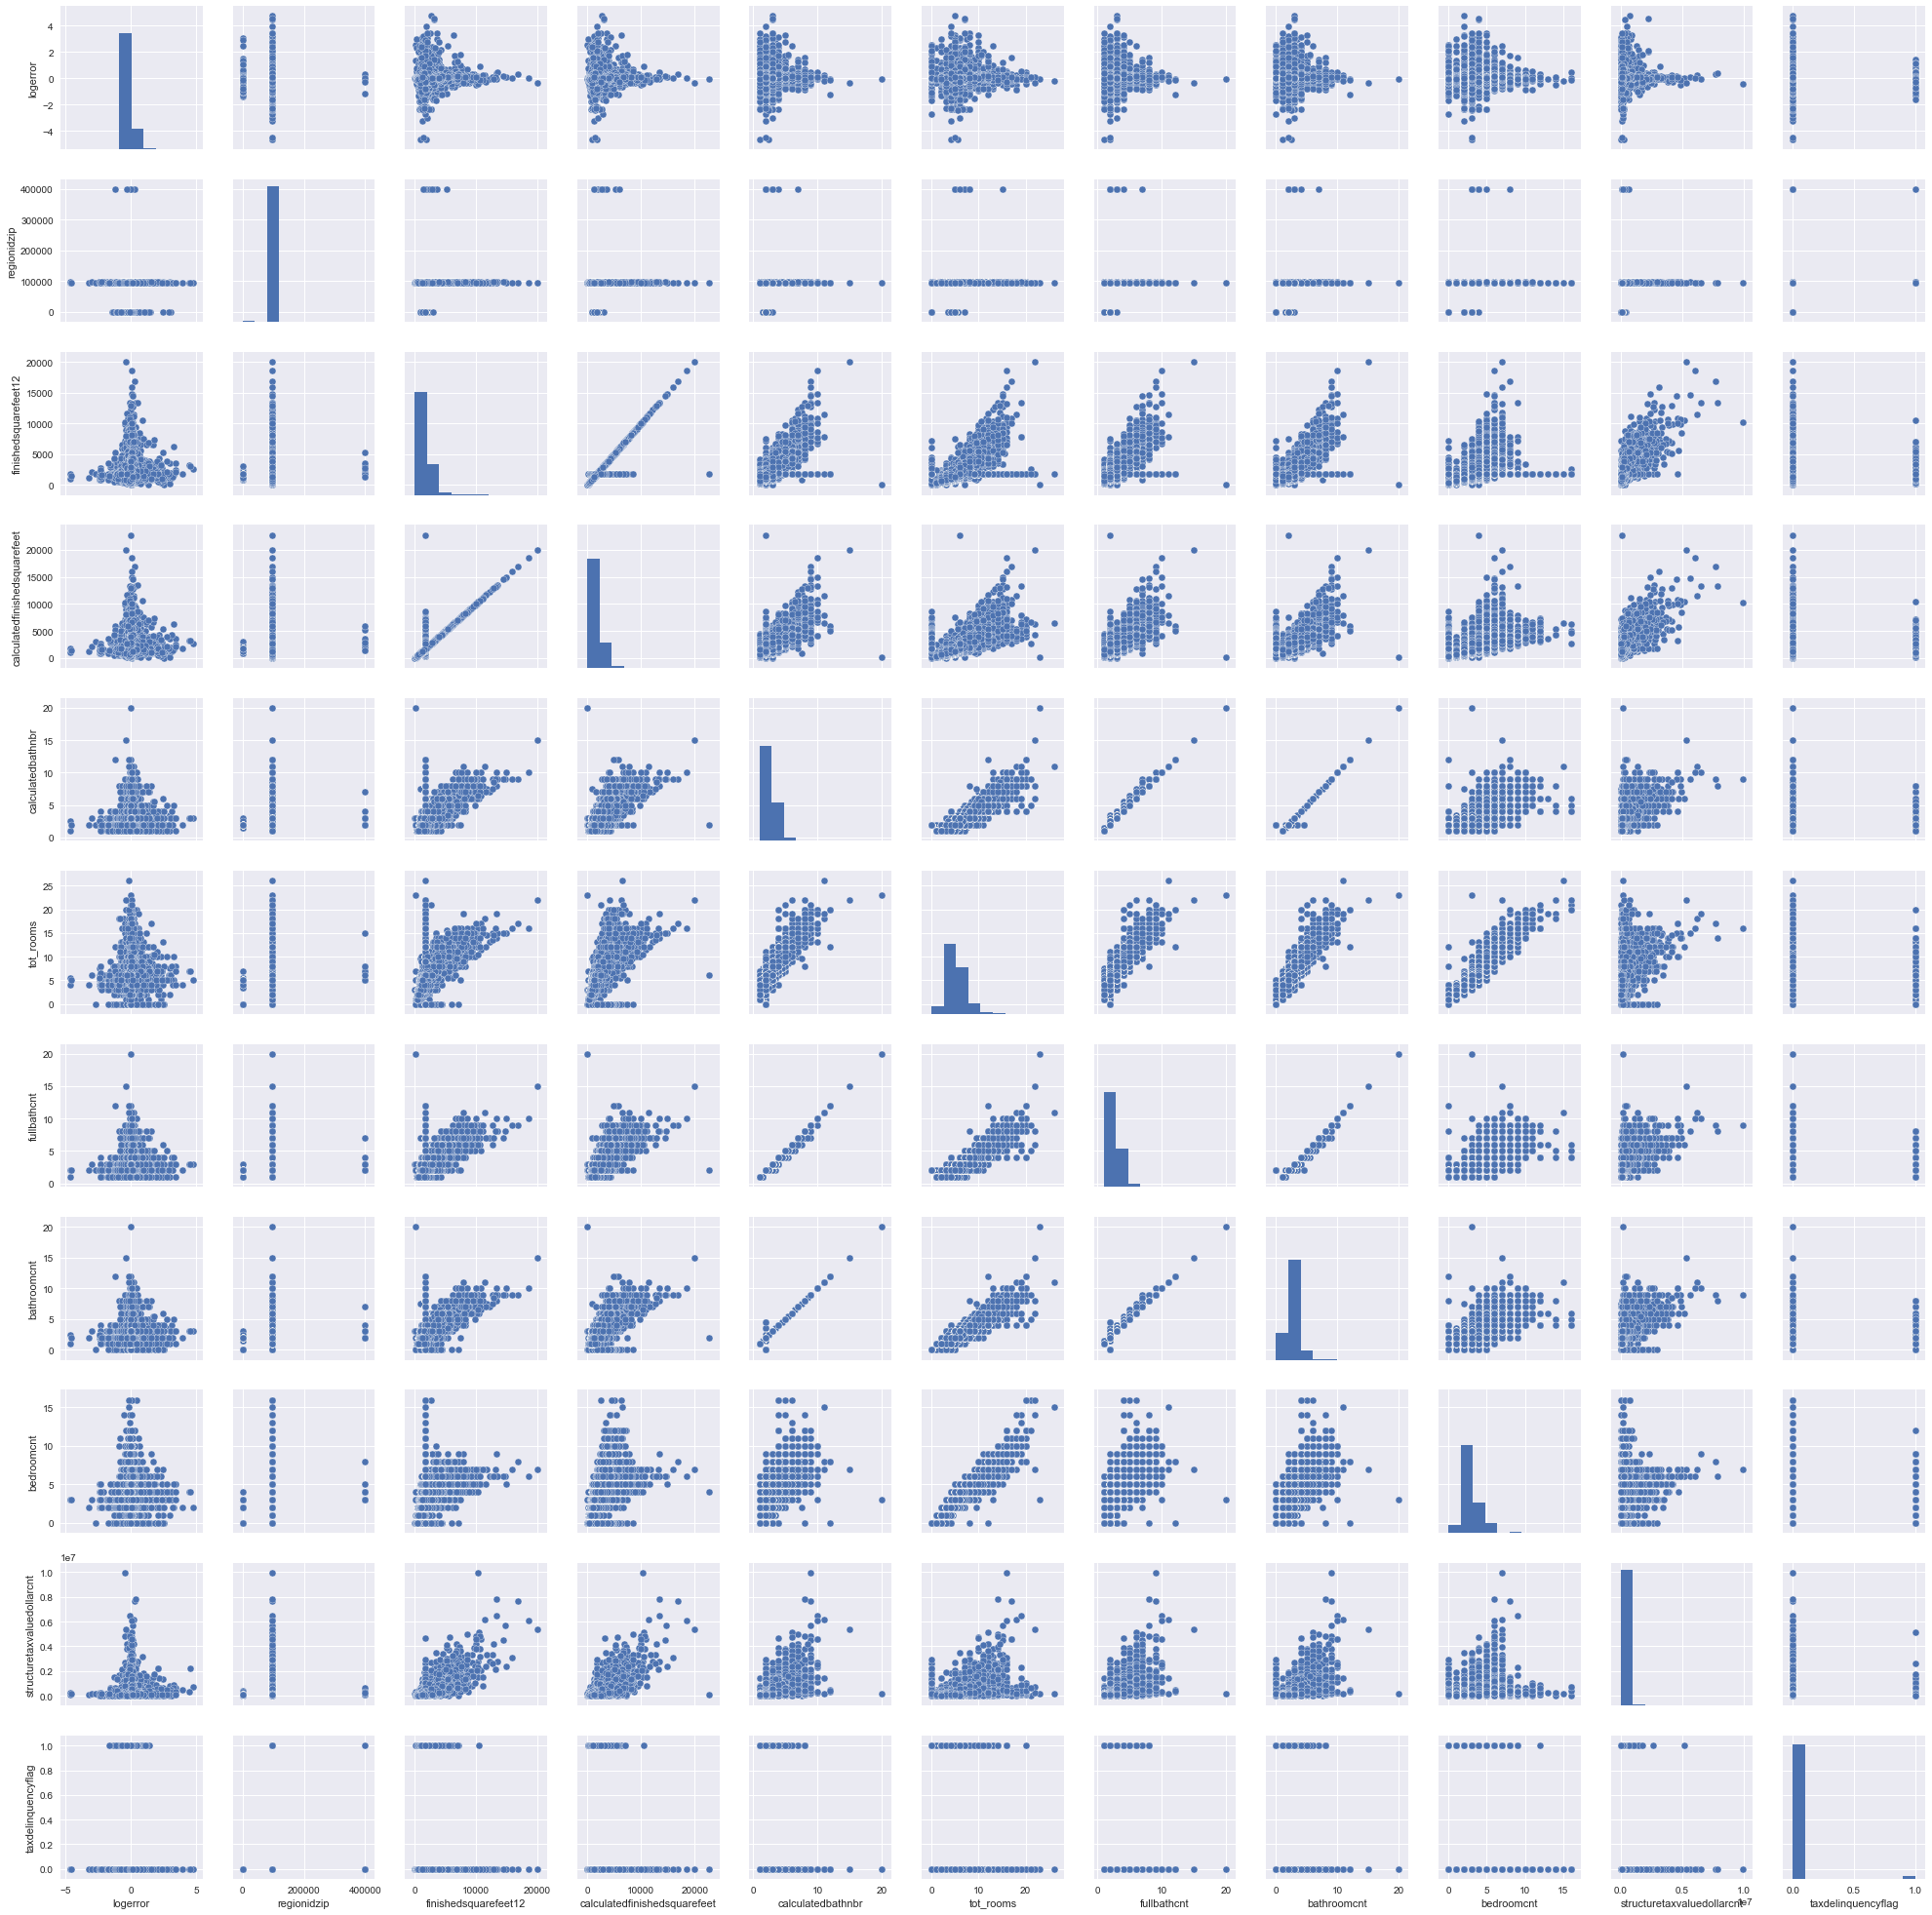

In [5]:
#scatterplot of top 10 highly correlated features
sea.set()
cols = ['logerror', 'regionidzip','finishedsquarefeet12','calculatedfinishedsquarefeet','calculatedbathnbr','tot_rooms','fullbathcnt','bathroomcnt','bedroomcnt','structuretaxvaluedollarcnt','taxdelinquencyflag']
sea.pairplot(final[cols], size = 2.5)
plt.show();

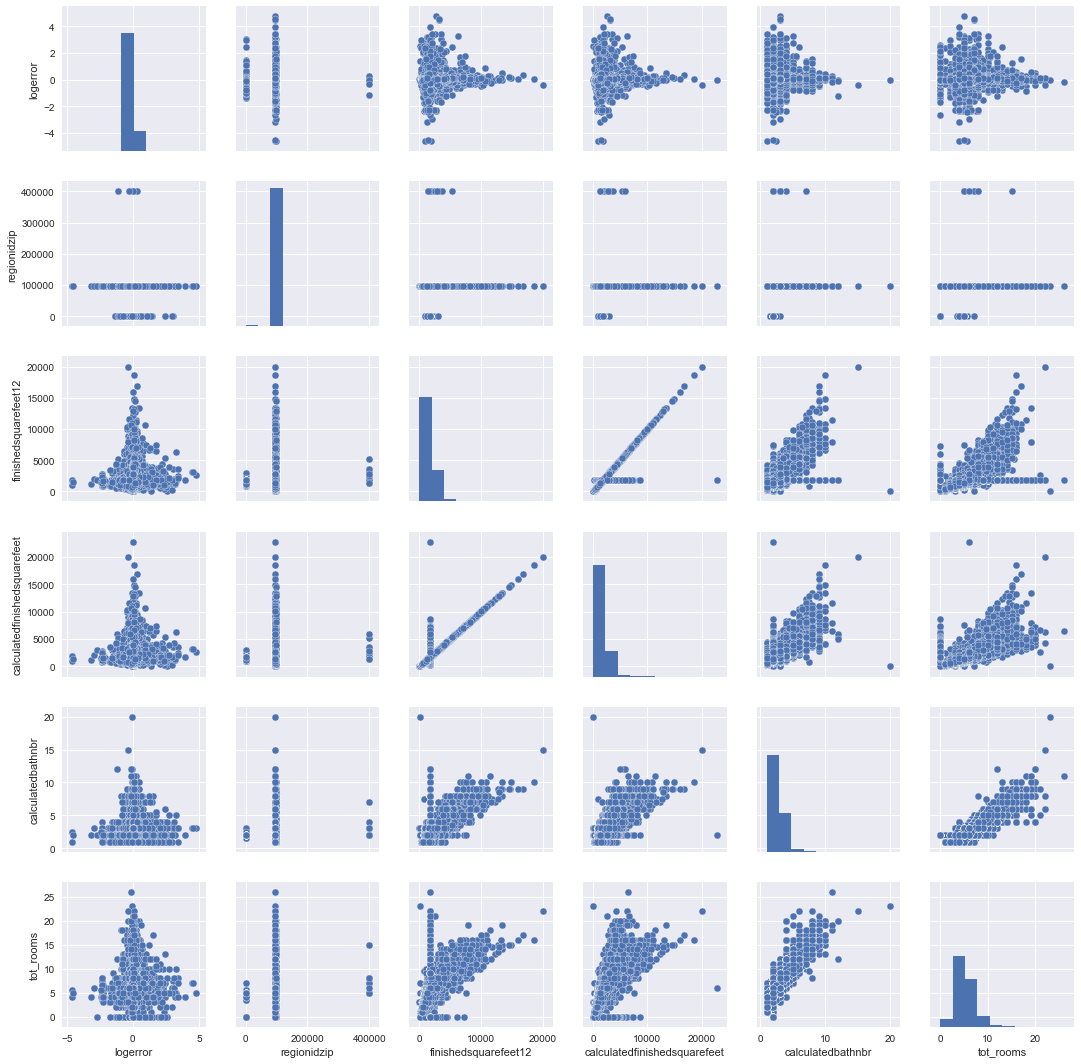

In [12]:
#scatterplot of top 5 highly correlated features
sea.set()
cols = ['logerror', 'regionidzip','finishedsquarefeet12','calculatedfinishedsquarefeet','calculatedbathnbr','tot_rooms']
sea.pairplot(final[cols], size = 2.5)
plt.show();

## Part B - Ordinary Least Squares

In [6]:
import statsmodels.api
import statsmodels.formula.api as smf

C:\Users\ceribrum\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [7]:
model1=smf.ols(formula='logerror ~regionidzip', data=final).fit()
model2=smf.ols(formula='logerror ~calculatedbathnbr', data=final).fit()
model3=smf.ols(formula='logerror ~fullbathcnt', data=final).fit()
model4=smf.ols(formula='logerror ~bathroomcnt', data=final).fit()
model5=smf.ols(formula='logerror ~bedroomcnt', data=final).fit()
model6=smf.ols(formula='logerror ~structuretaxvaluedollarcnt', data=final).fit()
model7=smf.ols(formula='logerror ~taxdelinquencyflag', data=final).fit()
model8=smf.ols(formula='logerror ~taxdelinquencyyear', data=final).fit()
model9=smf.ols(formula='logerror ~regionidcounty', data=final).fit()
model10=smf.ols(formula='logerror ~garagetotalsqft', data=final).fit()

In [8]:
print(model1.summary())
print(model2.summary())
print(model3.summary())
print(model4.summary())
print(model5.summary())
print(model6.summary())
print(model7.summary())
print(model8.summary())
print(model9.summary())
print(model10.summary())

                            OLS Regression Results                            
Dep. Variable:               logerror   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     154.1
Date:                Sun, 13 Aug 2017   Prob (F-statistic):           2.35e-35
Time:                        05:40:21   Log-Likelihood:                 35794.
No. Observations:               90811   AIC:                        -7.158e+04
Df Residuals:                   90809   BIC:                        -7.156e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.0654      0.006    -10.611      

In [10]:
#Regression with the top correlated features
model=smf.ols(formula='logerror ~regionidzip+finishedsquarefeet12+calculatedbathnbr+calculatedfinishedsquarefeet+tot_rooms+fullbathcnt+bathroomcnt+bedroomcnt+structuretaxvaluedollarcnt+taxdelinquencyflag', data=final).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               logerror   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     36.57
Date:                Sun, 13 Aug 2017   Prob (F-statistic):           2.23e-65
Time:                        05:56:13   Log-Likelihood:                 35881.
No. Observations:               90811   AIC:                        -7.174e+04
Df Residuals:                   90801   BIC:                        -7.165e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

With an adjusted R-squared value less than 1%, we will focus less on model interpretability. The compeition is split into two parts with more features relaesed in the 2nd half of the competition. Since we didn't have information such as quality of schools, average income, etc. we were not expecting to be able to explain most of the variance of the model